In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /home/dh3553/projects/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASET_NAME = 'Law_School'
EXPERIMENT_SESSION_UUID = 'a1345526-1623-4fc7-b1a4-2a7790c4eef5'
SENSITIVE_ATTRS = ['male', 'race', 'male&race']
# MODEL_NAMES = ['LogisticRegression']
MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(114, 33)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,male_priv_correct,male_priv_incorrect,overall,race_dis,race_dis_correct,race_dis_incorrect,race_priv,race_priv_correct,race_priv_incorrect,Test_Set_Index
0,Accuracy,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Law_School,200,OK,2024-01-03 01:38:47.285,a1345526-1623-4fc7-b1a4-2a7790c4eef5,Exp_iter_1,100,...,1.000000,0.000000,0.885769,0.712603,1.000000,0.000000,0.919559,1.000000,0.000000,0
24,Aleatoric_Uncertainty,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Law_School,200,OK,2024-01-03 01:38:47.285,a1345526-1623-4fc7-b1a4-2a7790c4eef5,Exp_iter_1,100,...,0.293815,0.622621,0.338008,0.464073,0.379105,0.674752,0.313409,0.286736,0.618321,0
48,Epistemic_Uncertainty,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Law_School,200,OK,2024-01-03 01:38:47.285,a1345526-1623-4fc7-b1a4-2a7790c4eef5,Exp_iter_1,100,...,0.019408,0.035327,0.021599,0.028682,0.024863,0.038152,0.020216,0.018823,0.036146,0
72,F1,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Law_School,200,OK,2024-01-03 01:38:47.285,a1345526-1623-4fc7-b1a4-2a7790c4eef5,Exp_iter_1,100,...,1.000000,0.000000,0.939276,0.829847,1.000000,0.000000,0.958074,1.000000,0.000000,0
96,FNR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Law_School,200,OK,2024-01-03 01:38:47.285,a1345526-1623-4fc7-b1a4-2a7790c4eef5,Exp_iter_1,100,...,0.000000,1.000000,0.002172,0.011628,0.000000,1.000000,0.000750,0.000000,1.000000,0
120,FPR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Law_School,200,OK,2024-01-03 01:38:47.285,a1345526-1623-4fc7-b1a4-2a7790c4eef5,Exp_iter_1,100,...,0.000000,1.000000,0.979866,0.959514,0.000000,1.000000,0.994269,0.000000,1.000000,0
144,IQR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Law_School,200,OK,2024-01-03 01:38:47.285,a1345526-1623-4fc7-b1a4-2a7790c4eef5,Exp_iter_1,100,...,0.051500,0.113061,0.059847,0.085480,0.069867,0.124193,0.054846,0.049662,0.114101,0
168,Jitter,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Law_School,200,OK,2024-01-03 01:38:47.285,a1345526-1623-4fc7-b1a4-2a7790c4eef5,Exp_iter_1,100,...,0.021133,0.088987,0.029975,0.064556,0.044535,0.114197,0.023227,0.018423,0.078148,0
192,Label_Stability,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Law_School,200,OK,2024-01-03 01:38:47.285,a1345526-1623-4fc7-b1a4-2a7790c4eef5,Exp_iter_1,100,...,0.973332,0.879968,0.961342,0.911390,0.939950,0.840574,0.971089,0.977433,0.898571,0
216,Mean_Prediction,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Law_School,200,OK,2024-01-03 01:38:47.285,a1345526-1623-4fc7-b1a4-2a7790c4eef5,Exp_iter_1,100,...,0.082439,0.214498,0.099690,0.154482,0.119118,0.242165,0.088998,0.078668,0.207085,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 864x432 with 0 Axes>

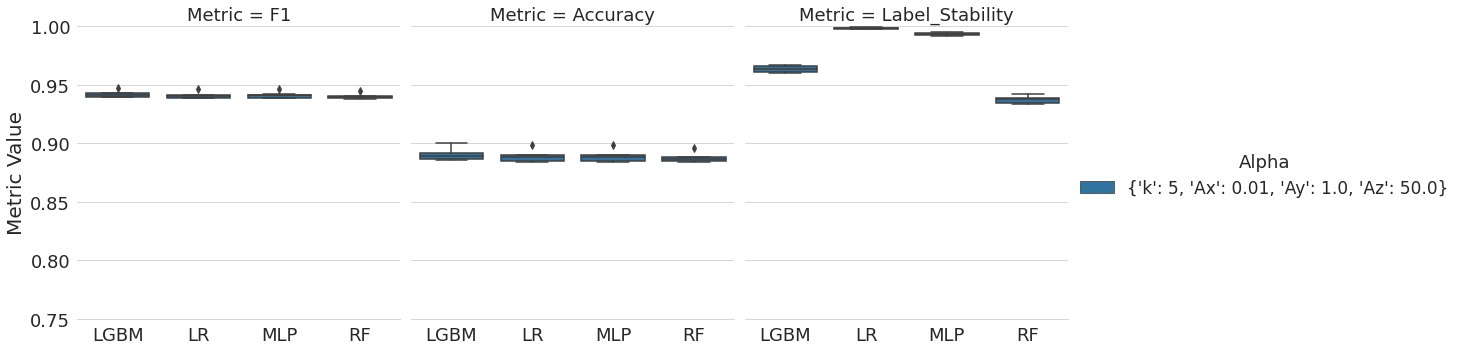

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

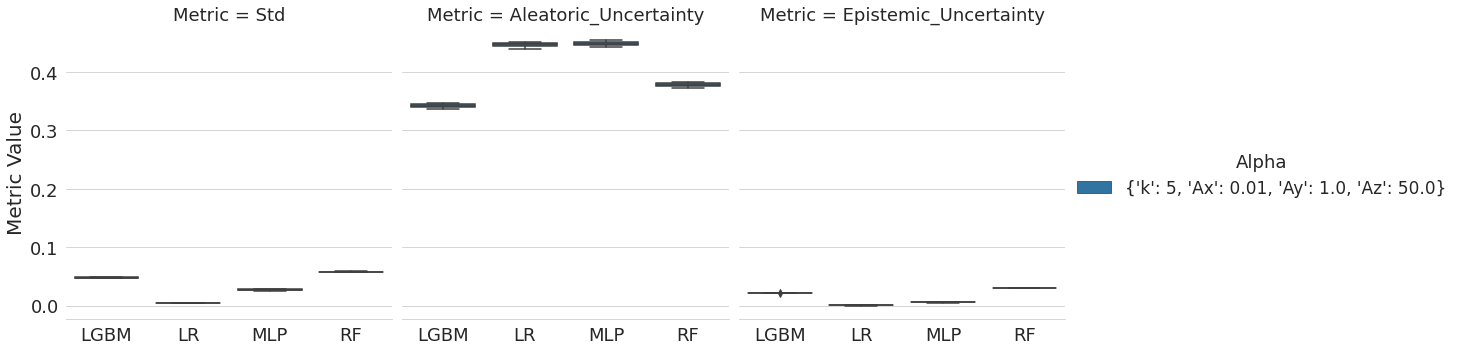

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           metric_names=['Std', 'Aleatoric_Uncertainty', 'Epistemic_Uncertainty'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 864x432 with 0 Axes>

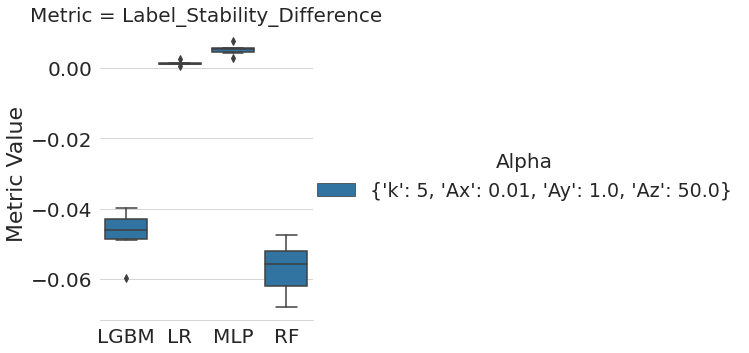

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='race',
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

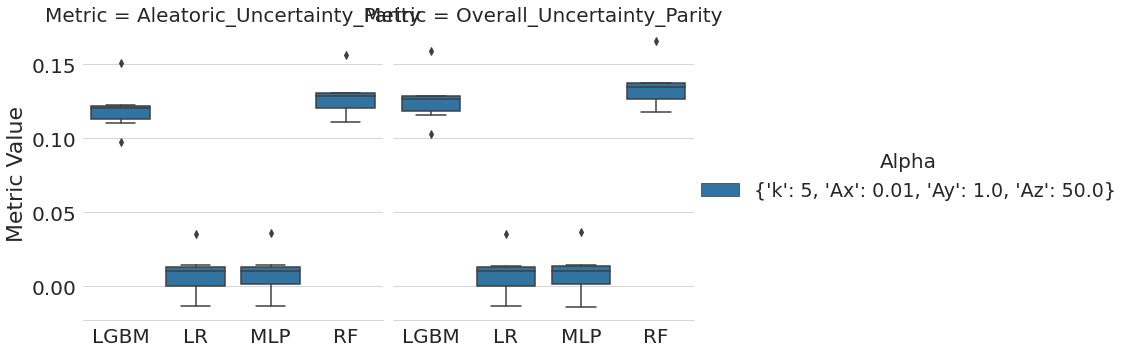

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='race',
                                           metric_names=['Aleatoric_Uncertainty_Parity',
                                                         'Overall_Uncertainty_Parity'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

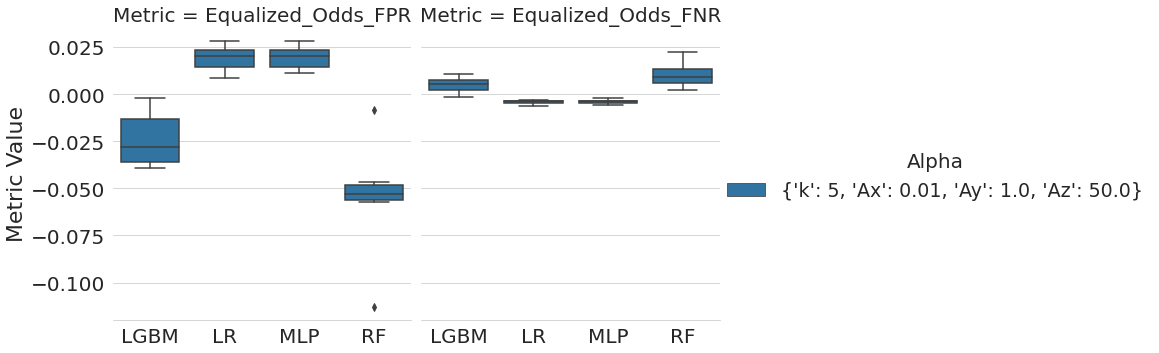

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='race',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

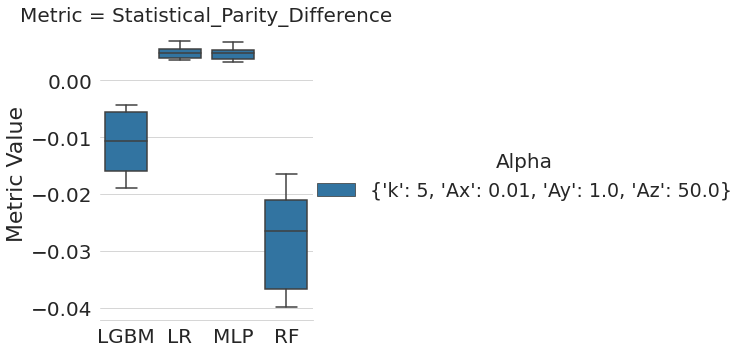

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='race',
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)